In [22]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Downloading the dataset

The kaggle challange can be [accessed  here](https://www.kaggle.com/competitions/isic-2024-challenge/overview). \
The dataset is a set of 139 x 139 RGB images. The images are labeled whether they depict skin cancer. Additional metadata is also provided (e.g. age, sex, etc. of the patient)


Run the cell below to install the kaggle library. The `dowload_data()` function uses this library to download the dataset. For this, you have to configure your username and api-key in a json format under the `~/.kaggle` directory. \ 
Additionally you can download the dataset using the kaggle cli:
```commandLine
kaggle competitions download -c isic-2024-challenge
```
or directly from the website.

In [ ]:
# Run to install kaggle package. Place the username and api key in a json configuration under ~/.kaggle directory.
!python -m pip install kaggle --upgrade

In [ ]:
import kaggle
import zipfile

def download_data():
    challange_name = "isic-2024-challenge"
    # create directory for the data
    Path.mkdir("data", exist_ok=True)
    kaggle.api.competition_download_files(challange_name)

    # extract zip to the data dir
    with zipfile.ZipFile(challange_name + ".zip") as zip_handle:
        zip_handle.extractall("data")

In [ ]:
download_data()

## Loading the data

Loading the images, corresponding metadata and obtaining the labels

In [57]:
DATASET_HOME = Path.cwd() / "data"
TRAIN_IMAGES_PATH = DATASET_HOME / "train-image" / "image"
METADATA_PATH = DATASET_HOME / "train-metadata.csv"

image_iterator = TRAIN_IMAGES_PATH.glob("*")
image_count = len(list(image_iterator))
print("The dataset contains {} images".format(image_count))

The dataset contains 401059 images


In [58]:
# Read the metadata, which contains the labels

df = pd.read_csv(METADATA_PATH)
df.head()

C:\Users\csonto.benjamin\AppData\Local\Temp\ipykernel_25616\1625701450.py:3: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(METADATA_PATH)


,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,tbp_lv_L,tbp_lv_Lext,tbp_lv_areaMM2,tbp_lv_area_perim_ratio,tbp_lv_color_std_mean,tbp_lv_deltaA,tbp_lv_deltaB,tbp_lv_deltaL,tbp_lv_deltaLB,tbp_lv_deltaLBnorm,tbp_lv_eccentricity,tbp_lv_location,tbp_lv_location_simple,tbp_lv_minorAxisMM,tbp_lv_nevi_confidence,tbp_lv_norm_border,tbp_lv_norm_color,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,16.261975,26.922447,23.954773,33.684638,28.953117,53.058545,55.828924,54.367448,62.025701,3.152561,27.476170,0.00000,3.982447,2.967674,-7.658253,8.360566,5.784302,0.901302,Right Leg - Upper,Right Leg,1.543016,2.628592e-03,7.091360,0.000000,9.307003,0.00000,2.036195,2.637780,0.590476,85,-182.703552,613.493652,-42.427948,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,25.364740,26.331000,24.549290,41.219030,35.299260,39.702910,44.064040,48.861520,55.362360,0.919497,12.235290,0.00000,6.347830,1.781713,-6.500838,6.839008,4.987244,0.639885,Head & Neck,Head & Neck,0.821918,1.334303e-07,2.116402,0.000000,3.354148,0.00000,0.853227,3.912844,0.285714,55,-0.078308,1575.687000,57.174500,Memorial Sloan Kettering Cancer Center,CC-BY,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,17.128170,37.970460,33.485410,44.174920,37.611800,59.265850,62.909730,53.961180,61.670520,3.265153,24.184620,0.00000,5.447655,4.485044,-7.709336,9.092376,6.290359,0.932147,Torso Back Top Third,Torso Back,1.194905,2.959177e-04,4.798335,0.000000,8.886309,0.00000,1.743651,1.950777,0.361905,105,123.649700,1472.010000,232.908900,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,12.164757,21.448144,21.121356,25.746200,24.374023,56.414429,60.060388,18.649518,23.314841,6.079940,14.889242,0.51452,2.077572,0.326788,-4.665323,4.783413,6.400196,0.654458,Torso Front Top Half,Torso Front,2.481328,2.198945e+01,1.975874,1.771705,9.514499,0.66469,1.258541,1.573733,0.209581,130,-141.024780,1442.185791,58.359802,ACEMID MIA,CC-0,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,20.057470,26.464900,25.710460,36.217980,32.608740,46.946070,52.041180,46.276310,54.855740,2.101708,19.902560,0.00000,4.668053,0.754434,-8.579431,9.148495,6.531302,0.946448,Torso Front Top Half,Torso Front,0.929916,1.378832e-03,3.658854,0.000000,6.467562,0.00000,2.085409,2.480509,0.313433,20,-72.315640,1488.720000,21.428960,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [81]:
from itertools import islice

# Uncomment the multiplication to only load a small portion of the dataset for experimentation
load_count = image_count # * 0.01
print("Number of images to be loaded {}".format(load_count))

X = []
metadata = []
for file_path in islice(TRAIN_IMAGES_PATH.glob("*"), 0, int(load_count)):
    filename = file_path.with_suffix("").name
    row = df.loc[df["isic_id"] == filename]
    X.append(plt.imread(file_path))
    metadata.append(row)

Y = [row["target"] for row in metadata]

Validation count 4010.59


### Show example of a negative and a positive sample

Text(0.5, 1.0, 'Benign')

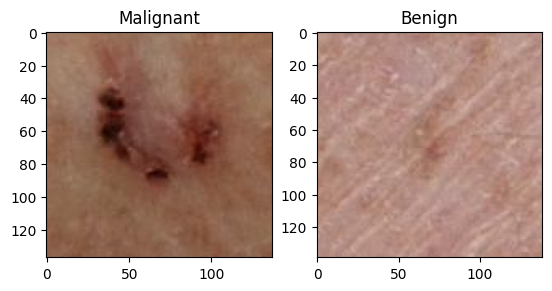

In [89]:
malignant_idx = next(i for i,v in enumerate(Y) if v.item() == 1)
malignant = X[malignant_idx]
benign_idx = next(i for i,v in enumerate(Y) if v.item() == 0)
benign = X[benign_idx]

fig, ax = plt.subplots(1, 2)
ax[0].imshow(malignant)
ax[0].set_title("Malignant")

ax[1].imshow(benign)
ax[1].set_title("Benign")

## Preprocessing

* Scaling the images
* Creating the train-test splits